In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_theme()
sns.set_style("whitegrid")

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor

In [2]:
mldata = pd.read_csv("mldata.csv")

In [3]:
# Preprocessing of Decision Tree Reg with "post_click_sales_amount" as Target

# all Campaigns
mldata_camp_total = mldata

# Only Camp 1
mldata_camp_1 = mldata[mldata["campaign_number"] == "camp 1"]

# Only Camp 2
mldata_camp_2 = mldata[mldata["campaign_number"] == "camp 2"]

# Only Camp 3
mldata_camp_3 = mldata[mldata["campaign_number"] == "camp 3"]


# Selection of selected features relevant for ML - without "campaign_number" as feature - with "post_click_sales_amount" as label:

# all Campaigns
mldata_camp_total = mldata_camp_total[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

# Only Camp 1
mldata_camp_1 = mldata_camp_1[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

# Only Camp 2
mldata_camp_2 = mldata_camp_2[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

# Only Camp 3
mldata_camp_3 = mldata_camp_3[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

mldata_camp_3.head()


,banner,placement,ad_spend_by_company_x,post_click_sales_amount
0,160 x 600,def,0.2096,0.0000
1,160 x 600,ghi,0.0000,0.0000
2,160 x 600,mno,2.6210,532.0745
3,160 x 600,abc,0.0000,0.0000
4,160 x 600,def,1.1008,0.0000




The model performance for test set
--------------------------------------
MAE: 1056.4893984550104
MSE: 26394704.344680022
RMSE: 5137.577672861017
R2 score is 0.7550856350224293


The model performance for training set
--------------------------------------
R2 score is 0.97413531739925




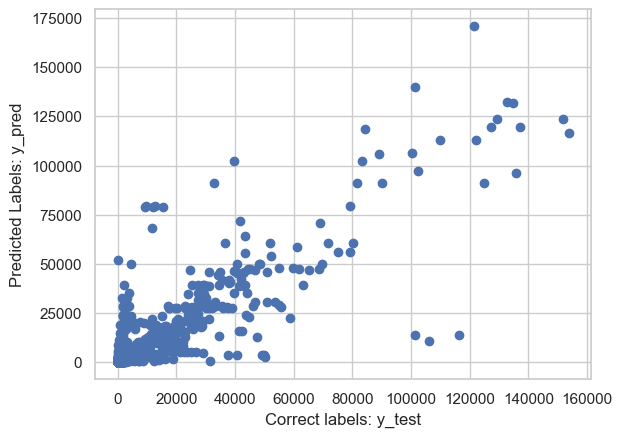

In [25]:
### Decision Tree Regression - all Campaigns  ###

# Define the features(X) and the label(y)
X = mldata_camp_total[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_total[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for Decision Tree Regression
tree = DecisionTreeRegressor(max_depth=10, random_state=100)

# Train model
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Visualisation of the correct vs. predicted labels 
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2_score(y_train, tree.predict(X_train))))
print("\n")





The model performance for test set
--------------------------------------
MAE: 1182.711189758519
MSE: 16289645.332491795
RMSE: 4036.043276835841
R2 score is 0.9299835759438428


The model performance for training set
--------------------------------------
R2 score is 0.9934686631521674




array([151674.863])

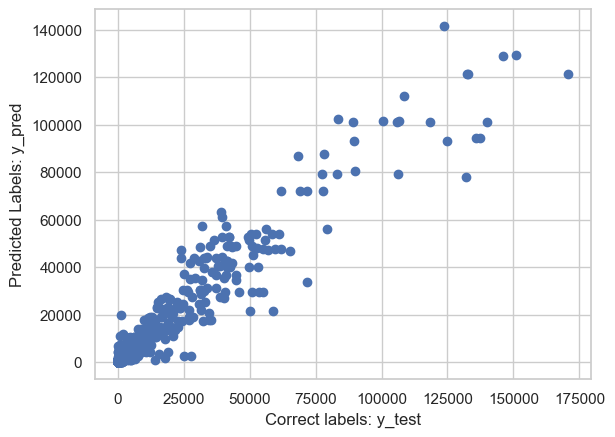

In [24]:
### Decision Tree Regression - Campaign 1  ###

# Define the features(X) and the label(y)
X = mldata_camp_1[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_1[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for Decision Tree Regression
tree = DecisionTreeRegressor(max_depth=10, random_state=100)

# Train model
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Visualisation of the correct vs. predicted labels 
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2_score(y_train, tree.predict(X_train))))
print("\n")

prediction_data = pd.DataFrame([[1000000, 0, 0, 0, 0, 100, 0, 0, 0, 100, 0, 0]], columns=X_train.columns)
tree.predict(prediction_data) # gibt mir die exakte Vorhersage



The model performance for test set
--------------------------------------
MAE: 495.8453367364152
MSE: 6752486.247249505
RMSE: 2598.5546458078393
R2 score is -0.47470454485131564


The model performance for training set
--------------------------------------
R2 score is 0.9963945860439771




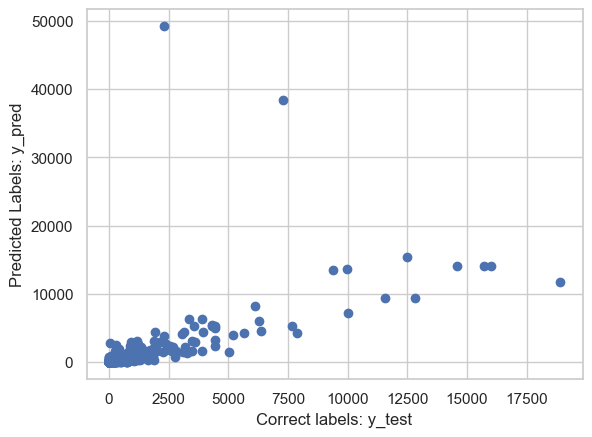

In [23]:
### Decision Tree Regression - Campaign 2  ###

# Define the features(X) and the label(y)
X = mldata_camp_2[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_2[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for Decision Tree Regression
tree = DecisionTreeRegressor(max_depth=10, random_state=100)

# Train model
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Visualisation of the correct vs. predicted labels 
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2_score(y_train, tree.predict(X_train))))
print("\n")




The model performance for test set
--------------------------------------
MAE: 130.7451563293678
MSE: 1769815.8424980848
RMSE: 1330.3442571372586
R2 score is -0.001146890944946355


The model performance for training set
--------------------------------------
R2 score is 0.5415472005722786




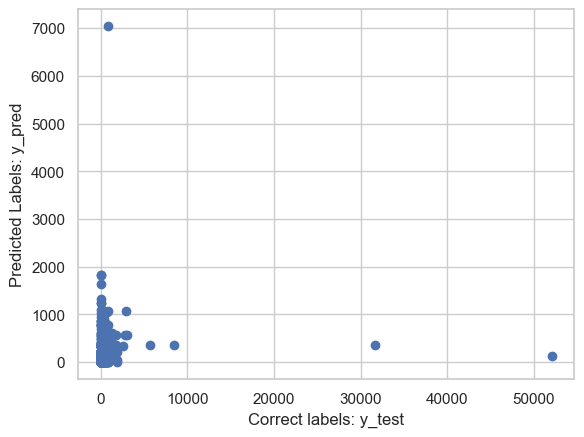

In [22]:
### Decision Tree Regression - Campaign 3  ###

# Define the features(X) and the label(y)
X = mldata_camp_3[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_3[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for Decision Tree Regression
tree = DecisionTreeRegressor(max_depth=10, random_state=100)

# Train model
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Visualisation of the correct vs. predicted labels 
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted Labels: y_pred')
print("\n")

# Model performance for test data set:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure
print('R2 score is {}'.format(r2))
print("\n")

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2_score(y_train, tree.predict(X_train))))
print("\n")